In [88]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import matplotlib.cm as cm


In [2]:
#importing dataset
net_data=pd.read_csv(r"C:\Users\91724\Downloads\file.csv")

In [3]:
net_data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
net_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [5]:
net_data.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [6]:
net_data.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s684,Movie,Backfire,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


Text(0.5, 0, 'Category of shows')

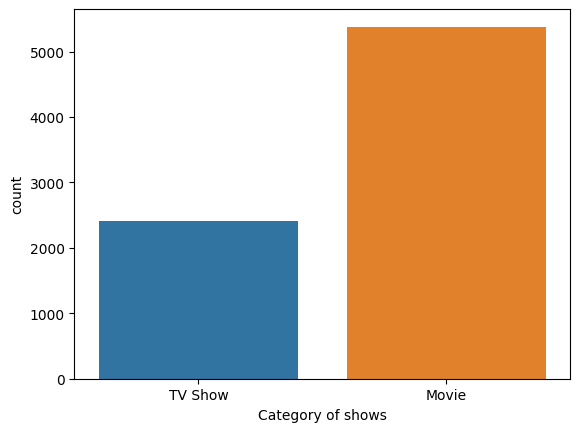

In [11]:
#Types of shows mostly seen
sns.countplot(x=net_data['Category'],hue=net_data['Category'])
plt.xlabel('Category of shows')

***Movies are seen lot more than Tv shows***

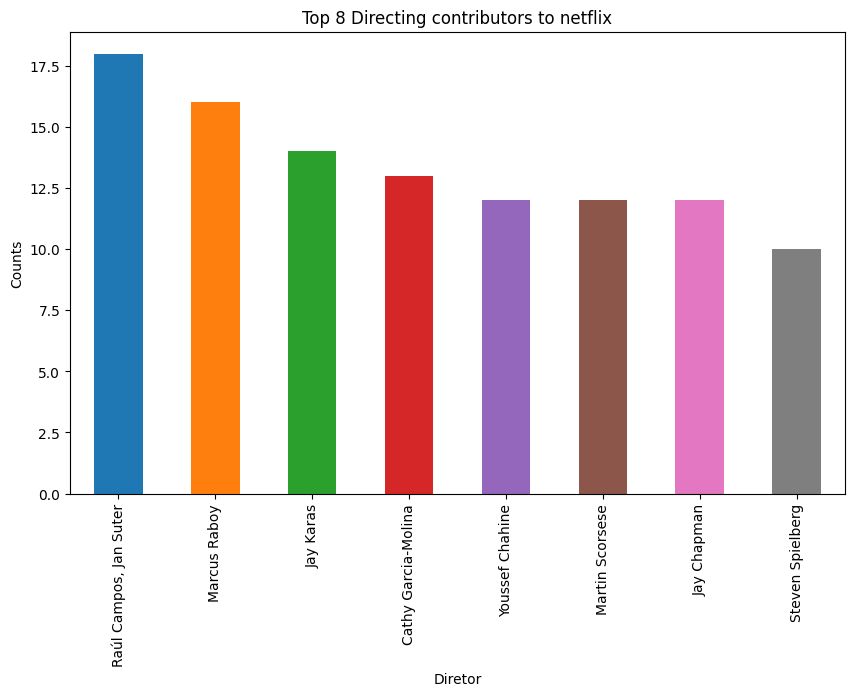

In [15]:

#Top 8 directors in terms of number of shows
director_counts = net_data['Director'].value_counts()


director_counts.nlargest(8).plot(kind='bar', figsize=(10,6),color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
plt.title('Top 8 Directing contributors to netflix')
plt.xlabel('Diretor')
plt.ylabel('Counts')
plt.show()

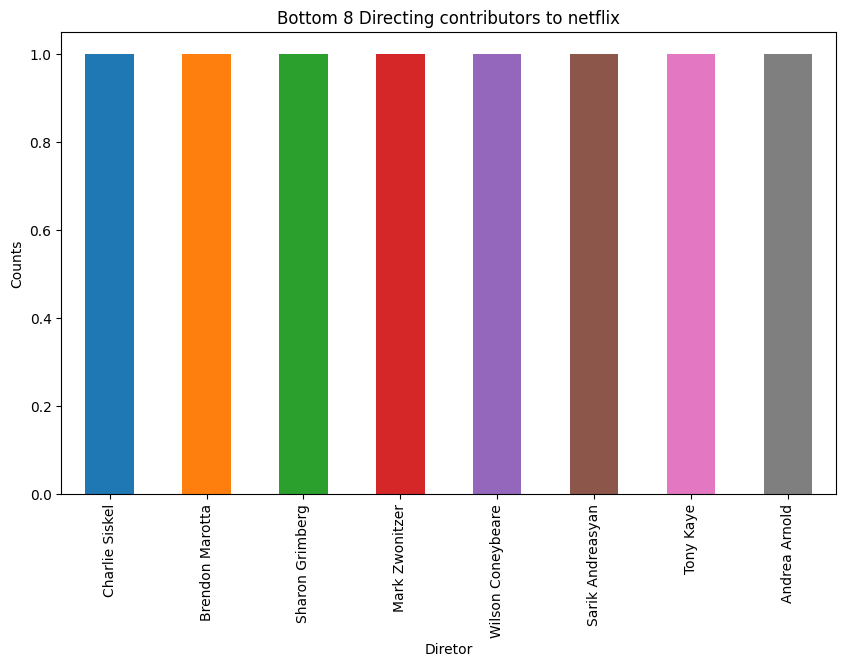

In [16]:

#Bottom 8 directors in terms of number of shows
director_counts = net_data['Director'].value_counts()
director_counts.nsmallest(8).plot(kind='bar', figsize=(10,6),color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
plt.title('Bottom 8 Directing contributors to netflix')
plt.xlabel('Diretor')
plt.ylabel('Counts')
plt.show()

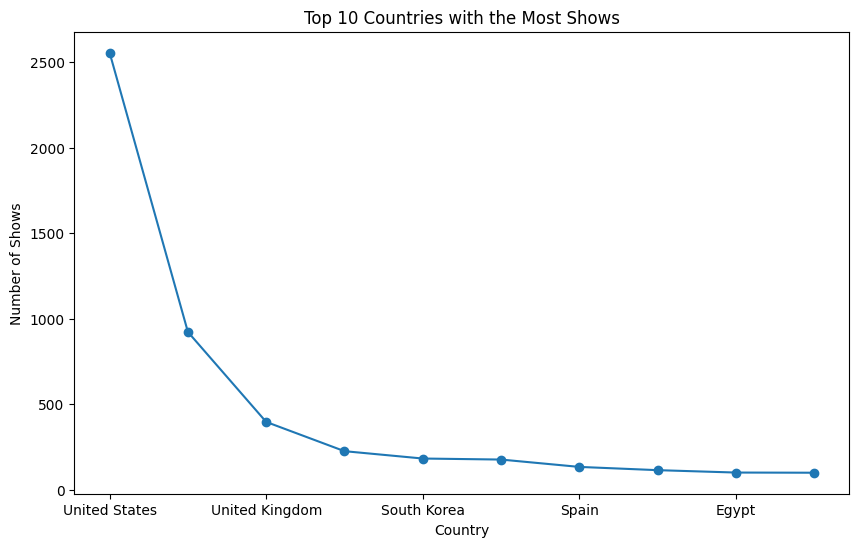

In [40]:
#Top 10 countries with most shows
country_counts = net_data['Country'].value_counts()
top_countries = country_counts.nlargest(10)
plt.figure(figsize=(10,6))
top_countries.plot(kind='line', marker='o')
plt.title('Top 10 Countries with the Most Shows')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.show()

***United states have the highest number of shows***

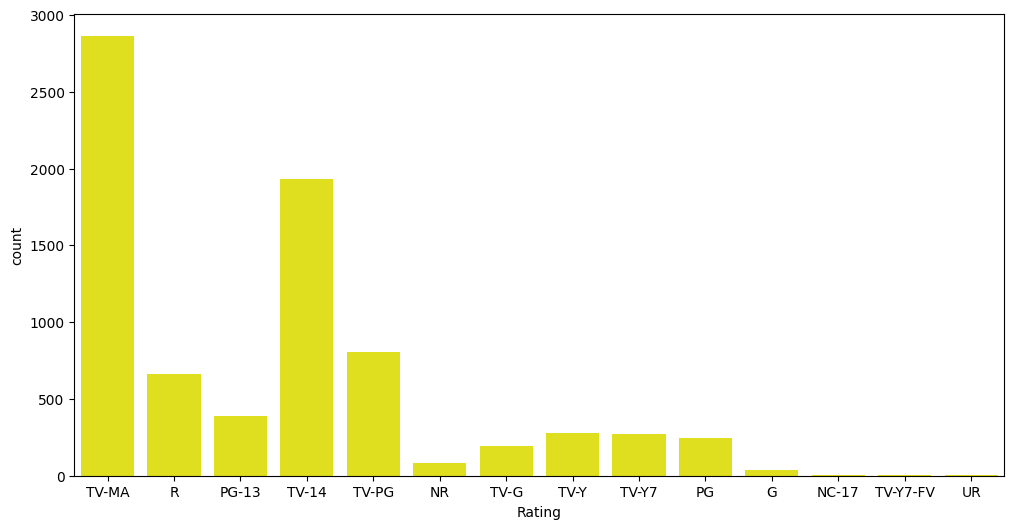

In [34]:
#Max rating type in shows
Rating_data=net_data['Rating']
plt.figure(figsize=(12,6)) 
sns.countplot(x=Rating_data,color='Yellow')
plt.show()

***Mostof the shows are in TV-MA ratings***

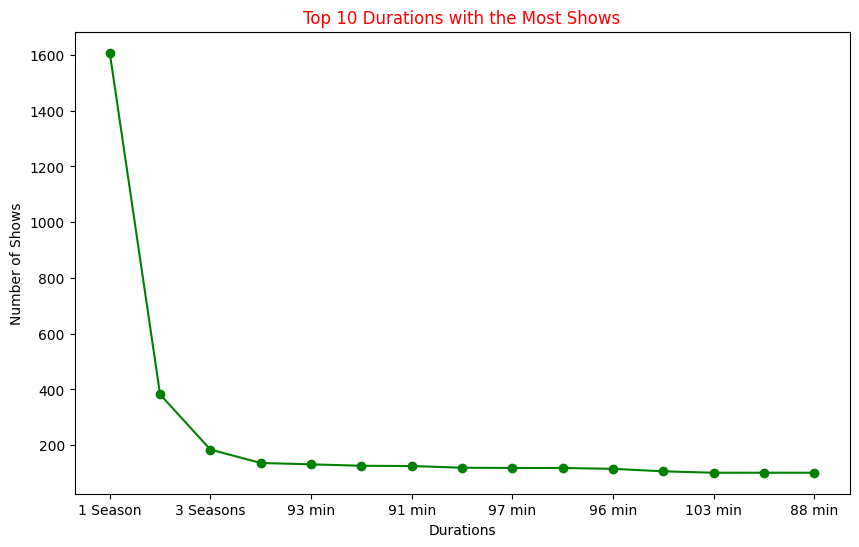

In [47]:
#Top 10 duration in terms of numbers

duration_counts = net_data['Duration'].value_counts()
top_durations = duration_counts.nlargest(15)
plt.figure(figsize=(10,6))
top_durations.plot(kind='line', marker='o',color='green')
plt.title('Top 10 Durations with the Most Shows',color='red')
plt.xlabel('Durations')
plt.ylabel('Number of Shows')
plt.show()


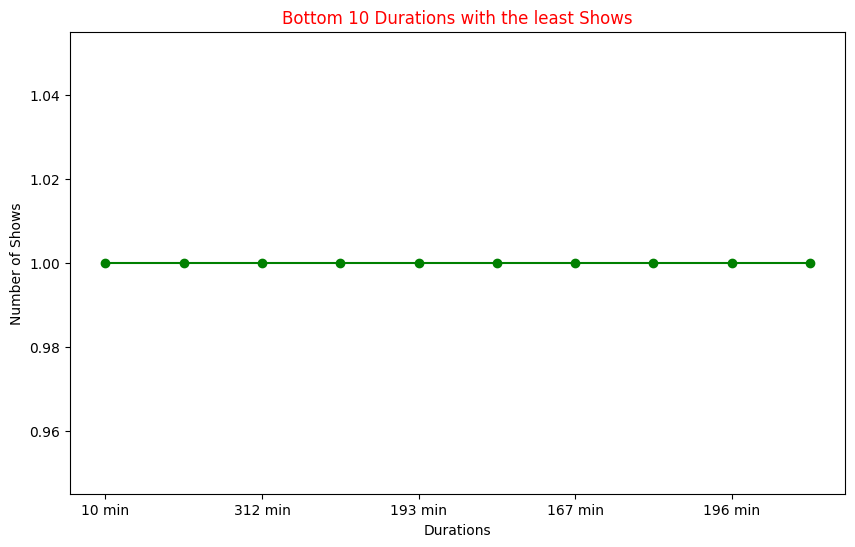

In [49]:
#Bottom 10 duration in terms of numbers

duration_counts = net_data['Duration'].value_counts()
top_durations = duration_counts.nsmallest(10)
plt.figure(figsize=(10,6))
top_durations.plot(kind='line', marker='o',color='green')
plt.title('Bottom 10 Durations with the least Shows',color='red')
plt.xlabel('Durations')
plt.ylabel('Number of Shows')
plt.show()

***Most of the people prefer shows with 1 season***

In [63]:
#Top 50 types of movies

type_counts = net_data['Type'].value_counts()

top_50_types = type_counts.nlargest(50)
top_50_types_df = top_50_types.to_frame('Count').reset_index()
top_50_types_df.columns = ['Type', 'Count']


styled_table = top_50_types_df.style.background_gradient(cmap="cubehelix")


display(styled_table)

,Type,Count
0,Documentaries,334
1,Stand-Up Comedy,321
2,"Dramas, International Movies",320
3,"Comedies, Dramas, International Movies",243
4,"Dramas, Independent Movies, International Movies",215
5,Kids' TV,205
6,Children & Family Movies,177
7,"Documentaries, International Movies",172
8,"Children & Family Movies, Comedies",169
9,"Comedies, International Movies",161


***Documentaries are the most preferred types by customers*** 

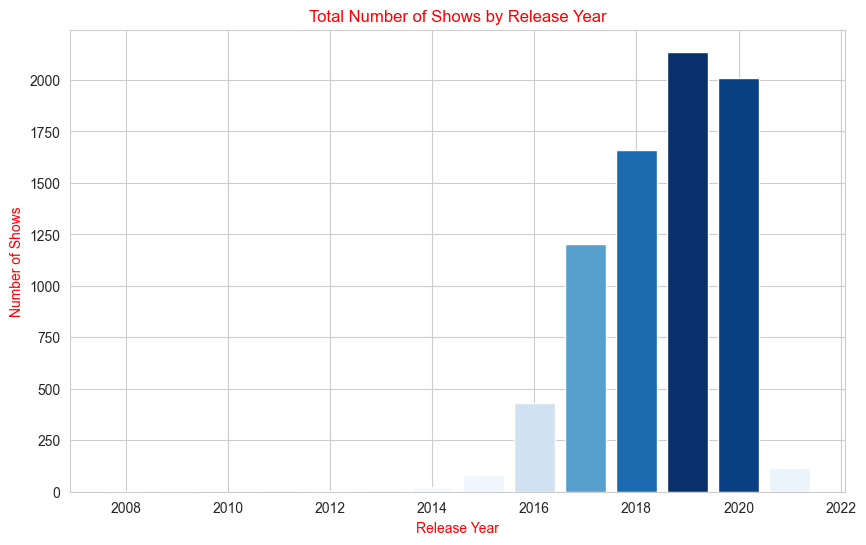

In [71]:
#Yearvise relese of shows
net_data['Release_Date'] = pd.to_datetime(net_data['Release_Date'], errors='coerce')
net_data['release_year'] = net_data['Release_Date'].dt.year
release_year_counts = net_data.groupby('release_year').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
plt.bar(release_year_counts['release_year'], release_year_counts['count'], color=cm.Blues(release_year_counts['count'] / release_year_counts['count'].max())) 
plt.xlabel('Release Year',color='red')
plt.ylabel('Number of Shows',color='red')
plt.title('Total Number of Shows by Release Year',color='red')
plt.show()

***Major shows are between 2018-2020 with 2019 being the largest***

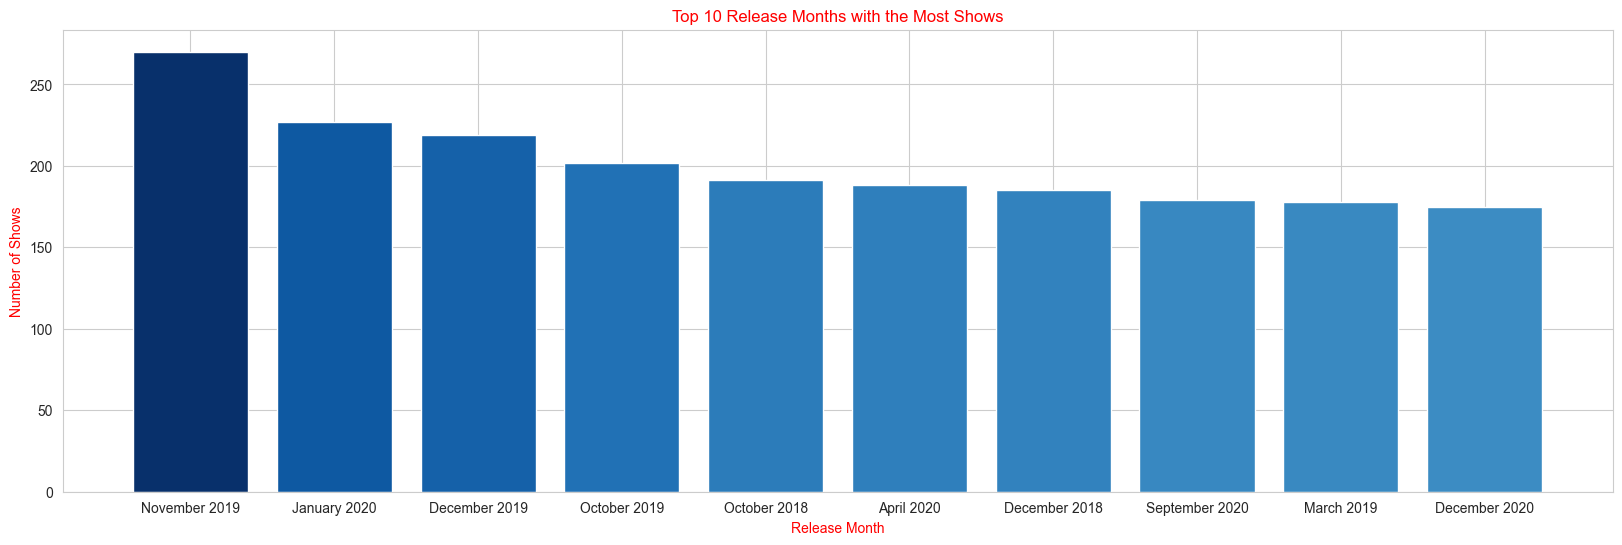

In [76]:
#Monthwise release of shows
net_data['release_date'] = pd.to_datetime(net_data['Release_Date'], errors='coerce')
net_data['release_month'] = net_data['release_date'].dt.strftime('%B %Y')
release_month_counts = net_data.groupby('release_month').size().reset_index(name='count')
top_10_release_months = release_month_counts.nlargest(10, 'count')
plt.figure(figsize=(20, 6))
plt.bar(top_10_release_months['release_month'], top_10_release_months['count'], color=cm.Blues(top_10_release_months['count'] / top_10_release_months['count'].max()))
plt.xlabel('Release Month',color='red')
plt.ylabel('Number of Shows',color='red')
plt.title('Top 10 Release Months with the Most Shows',color='red')
plt.show()

***November 2019 had the highest number of shows in Netflix followed vy january 2020 and december 2019 respectively***

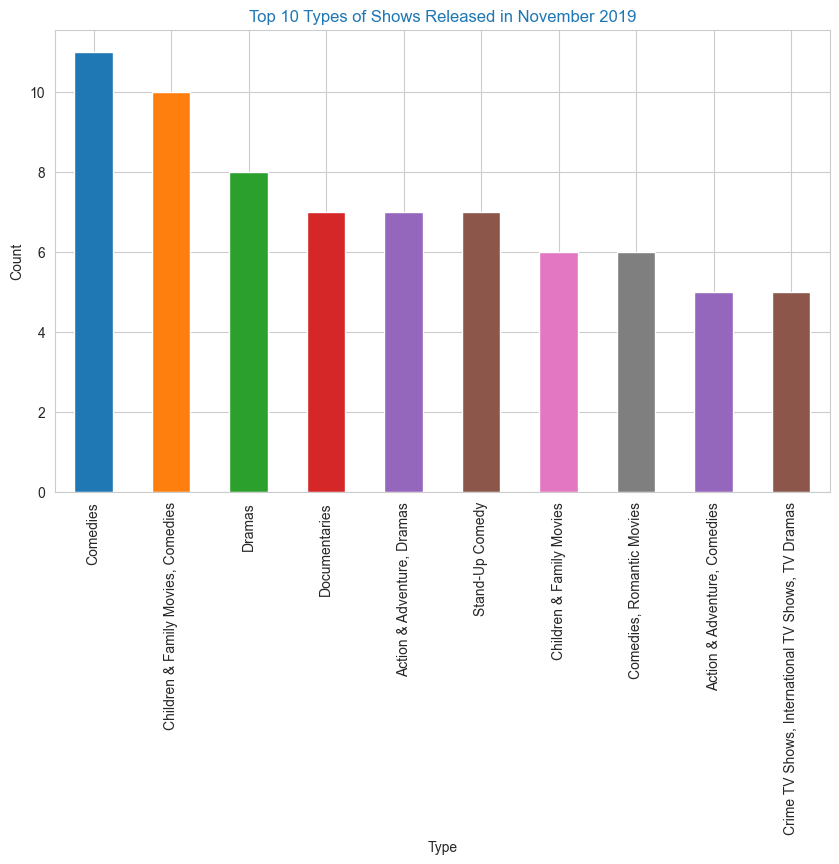

In [87]:
#Types of released shows of 2019
net_data['Released date'] = pd.to_datetime(net_data['Release_Date'], format='%m/%d/%Y')
nov_2019_data = net_data[(net_data['Released date'].dt.month == 11) & (net_data['Released date'].dt.year == 2019)]
type_counts = nov_2019_data['Type'].value_counts()
top_10_types = type_counts.nlargest(10)
plt.figure(figsize=(10,6))
top_10_types.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f','#9467bd', '#8c564b'])
plt.title('Top 10 Types of Shows seen in November 2019', color='#red')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

***Comedies were seen most in November 2019***